In [1]:
import os
import sys
from IPython.display import display, clear_output
import tensorflow as tf

sys.path.append(os.path.abspath("../"))
from src.utils import reload_script
from models_src.Support import LRCallback

clear_output(wait=True)
print(tf.config.list_physical_devices('GPU'))

[]


2025-03-24 08:29:04.878128: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


In [2]:
# set up databases
config_path = "../exp_lib/general_config/pixel_similarity_dot_shapes.json"
%run -i ../exp_lib/datasets_generators/pixel_similarity_dot_shapes.py {config_path}

In [3]:
# set up mlflow instance
%run -i ../exp_lib/mlflow/local_experiment.py {cfg.experiment_name}

In [ ]:
# set up Trainer
model_def_path = "../exp_lib/model_def/pixel_similarity_dot/radial_pixel_sim_unet_backboned.json"
trainer = None
%run -i ../exp_lib/utils/trainer_loader.py {model_def_path}

GridBox(children=(Text(value='carefree-gnat-93', description='run_name', layout=Layout(height='30px', width='3…

Button(description='Pass Parameters', style=ButtonStyle())

GridBox(children=(IntText(value=16, description='color_embs_num', layout=Layout(height='30px', width='300px'),…

Button(description='Accept Parameters', style=ButtonStyle())

Dictionary updated: {'color_embs_num': 16, 'color_embs_mid_layers': 2, 'enc_type': 'frequency', 'num_heads': 2, 'embs_dim': 128, 'color_embs_dim': 64, 'size': 32, 'embs_mid_layers': 2, 'dropout': 0.0, 'activation': 'relu', 'attn_mid_layers': 2, 'out_mid_layers': 1, 'attns_num': 3, 'attn_concat_colors': True, 'concat_memory': True, 'concat_colors': True, 'progressive': False, 'inverted_angle': True, 'backbone_def': {'run_name': 'carefree-gnat-93', 'load_mlflow_weights': True, 'load_mode': 'mlflow'}, 'backbone_trainable': False, 'backbone_last_layer': 'Up-Conv_2', 'backbone_init_layer': 'Batch-Normalization', 'name': 'PxRadSimDot'}
carefree-gnat-93 model def already cached
carefree-gnat-93 weights already cached
(1, 1024, 1024, 64) (None, 1024, 128)


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_3', however the 

Model: "PxRadSimDot"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Conne
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -    
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_
│ (BatchNormalization)        │                         │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch
│                             │ (None, 32, 32, 64)]     │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_2 (UNetConvBlock) │ [(None, 8, 8, 128),     │        369,024 │ Down-
│      

In [15]:
trainer.train_model(
    epochs = 15,
    callbacks = [LRCallback(warmup_lr=1e-5, warmup_epochs=1, decay_ratio=0.8)],
    log = True,
    export_final_state = True,
    export_model = False,
    export_model_def = True
)

MLflow run: casual-dolphin-490


Epoch 1/15


2025-03-23 09:08:39.729053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 24 bytes spill stores, 24 bytes spill loads

2025-03-23 09:08:40.099757: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3707', 192 bytes spill stores, 192 bytes spill loads

2025-03-23 09:08:40.158430: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3729', 192 bytes spill stores, 192 bytes spill loads

2025-03-23 09:08:41.147459: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3729', 24 bytes spill stores, 24 bytes spill loads



512/512 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 1.3016 - val_loss: 0.5296 - learning_rate: 1.0000e-05
Epoch 2/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.3119 - val_loss: 0.2807 - learning_rate: 0.0010
Epoch 3/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2751 - val_loss: 0.2760 - learning_rate: 8.0000e-04
Epoch 4/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2722 - val_loss: 0.2747 - learning_rate: 6.4000e-04
Epoch 5/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2695 - val_loss: 0.2758 - learning_rate: 5.1200e-04
Epoch 6/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2699 - val_loss: 0.2717 - learning_rate: 4.0960e-04
Epoch 7/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2671 - val_loss: 0.2720 - learning_rate: 3.2768e-04
Epoch 8/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2674 - val_loss: 0.2724 - learning_rate: 2.6214e-04
Epoch 9/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2663 - val_loss: 0.2706 - learn

2025/03/23 09:10:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run casual-dolphin-490 at: http://localhost:5000/#/experiments/580995121496438746/runs/7011d4dfdea349a69ec8a61daed90294.
2025/03/23 09:10:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/580995121496438746.


In [ ]:
# load model
trainer = None
run_name = 'casual-dolphin-490'
%run -i ../exp_lib/utils/trainer_loader.py --run_name={run_name}

total F1: 0.9690681
weighted F1: 0.91277725
sample F1: 0.9287856


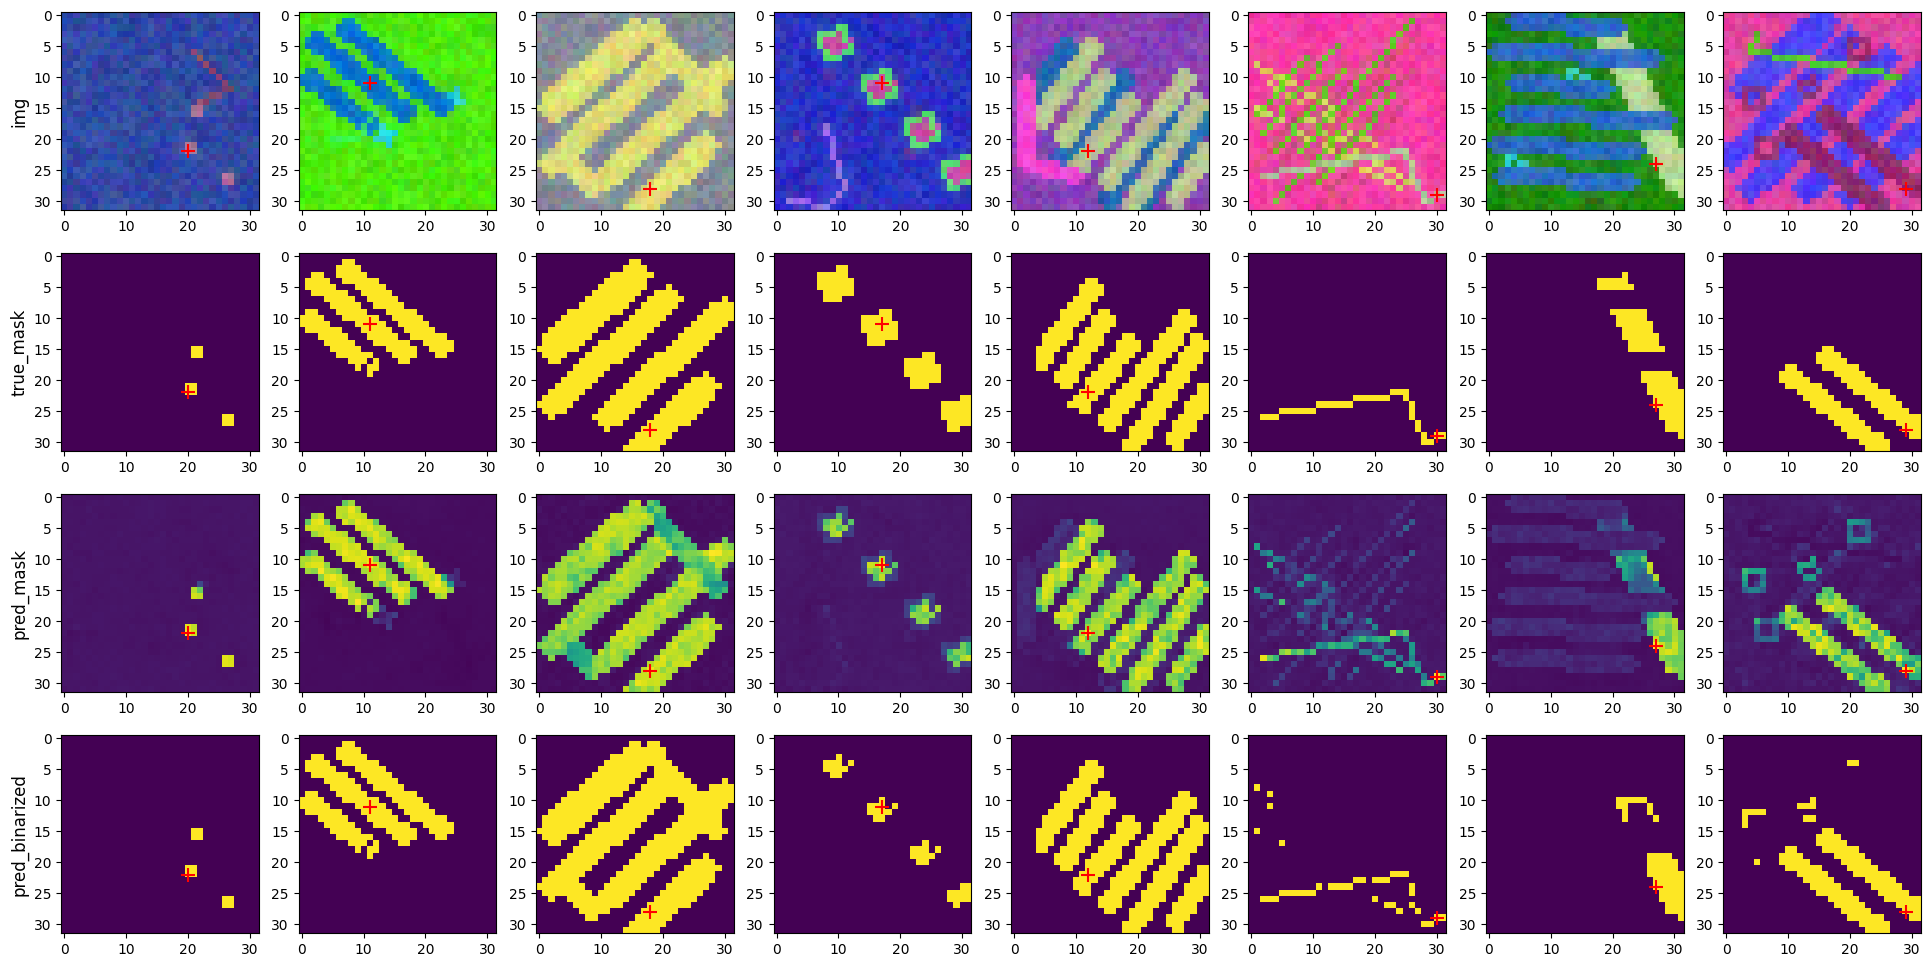

In [19]:
# plot results
%run -i ../exp_lib/plots/pixel_similarity.py --s=8 --next=1